In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [75]:
df = pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [76]:
df['Date']= pd.to_datetime(df['Date'])

df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day

df = df.dropna()
print(len(df))

56420


In [77]:
df.RainToday.replace({'No': 0, 'Yes': 1}, inplace=True)
df.RainTomorrow.replace({'No': 0, 'Yes': 1}, inplace=True)

/home/ada/anaconda3/envs/Python/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [78]:
df[df.duplicated() == True]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day


In [79]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,...,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,...,1014.795580,4.241705,4.326515,18.204961,22.710333,0.220879,0.220259,2012.221074,6.425009,15.723910
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,...,6.870892,2.797162,2.647251,6.567991,6.836543,0.414843,0.414425,2.450978,3.451383,8.782527
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,...,977.100000,0.000000,0.000000,-0.700000,3.700000,0.000000,0.000000,2007.000000,1.000000,1.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,...,1010.100000,1.000000,2.000000,13.100000,17.400000,0.000000,0.000000,2010.000000,3.000000,8.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,...,1014.700000,5.000000,5.000000,17.800000,22.400000,0.000000,0.000000,2012.000000,6.000000,16.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,...,1019.400000,7.000000,7.000000,23.300000,27.900000,0.000000,0.000000,2014.000000,9.000000,23.000000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,...,1038.900000,8.000000,9.000000,39.400000,46.100000,1.000000,1.000000,2017.000000,12.000000,31.000000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           56420 non-null  datetime64[ns]
 1   Location       56420 non-null  object        
 2   MinTemp        56420 non-null  float64       
 3   MaxTemp        56420 non-null  float64       
 4   Rainfall       56420 non-null  float64       
 5   Evaporation    56420 non-null  float64       
 6   Sunshine       56420 non-null  float64       
 7   WindGustDir    56420 non-null  object        
 8   WindGustSpeed  56420 non-null  float64       
 9   WindDir9am     56420 non-null  object        
 10  WindDir3pm     56420 non-null  object        
 11  WindSpeed9am   56420 non-null  float64       
 12  WindSpeed3pm   56420 non-null  float64       
 13  Humidity9am    56420 non-null  float64       
 14  Humidity3pm    56420 non-null  float64       
 15  Pressure9am    

<AxesSubplot:>

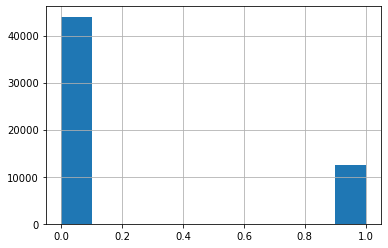

In [81]:
df.RainTomorrow.hist()

<AxesSubplot:xlabel='Cloud3pm', ylabel='Count'>

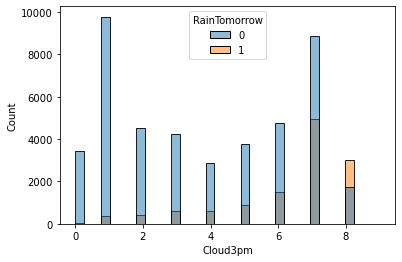

In [82]:
sns.histplot(data=df, x="Cloud3pm", hue="RainTomorrow")

<AxesSubplot:xlabel='Sunshine', ylabel='Count'>

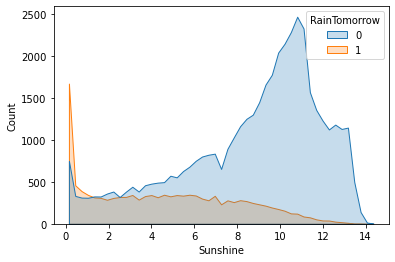

In [83]:
sns.histplot(df, x="Sunshine", hue="RainTomorrow", element="poly")

<AxesSubplot:xlabel='Humidity3pm', ylabel='Count'>

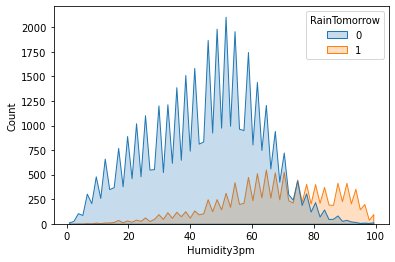

In [84]:
sns.histplot(df, x="Humidity3pm", hue="RainTomorrow", element="poly")

<AxesSubplot:xlabel='Month', ylabel='Count'>

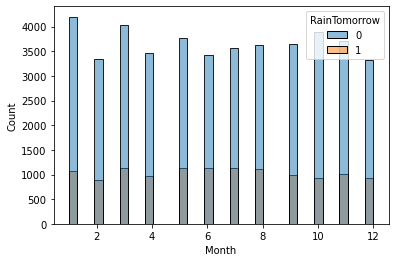

In [85]:
sns.histplot(df, x="Month", hue="RainTomorrow", element="bars")

<AxesSubplot:xlabel='Month'>

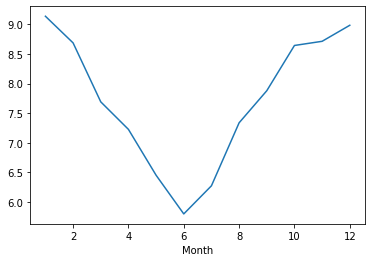

In [86]:
g = df.groupby('Month')
Sunshine = g['Sunshine'].mean()
Sunshine.plot(y='Sunshine', use_index=True)

<AxesSubplot:xlabel='Month'>

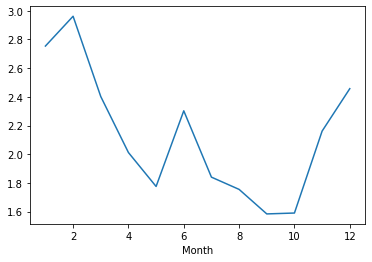

In [87]:
g = df.groupby('Month')
Rainfall = g['Rainfall'].mean()
Rainfall.plot(y='Rainfall', use_index=True)

<AxesSubplot:xlabel='Month'>

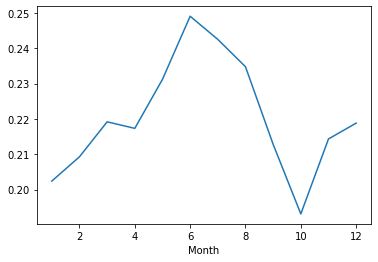

In [88]:
g = df.groupby('Month')
RainTomorrow = g['RainTomorrow'].mean()
RainTomorrow.plot(y='RainTomorrow', use_index=True)

In [89]:
len(df)

56420

In [90]:
df.RainTomorrow.value_counts()

0    43993
1    12427
Name: RainTomorrow, dtype: int64

In [91]:
x = "{:.2f}".format(12427/56420)
x = float(x)*100
print(f"{x}% of the data are days where it rains")

22.0% of the data are days where it rains


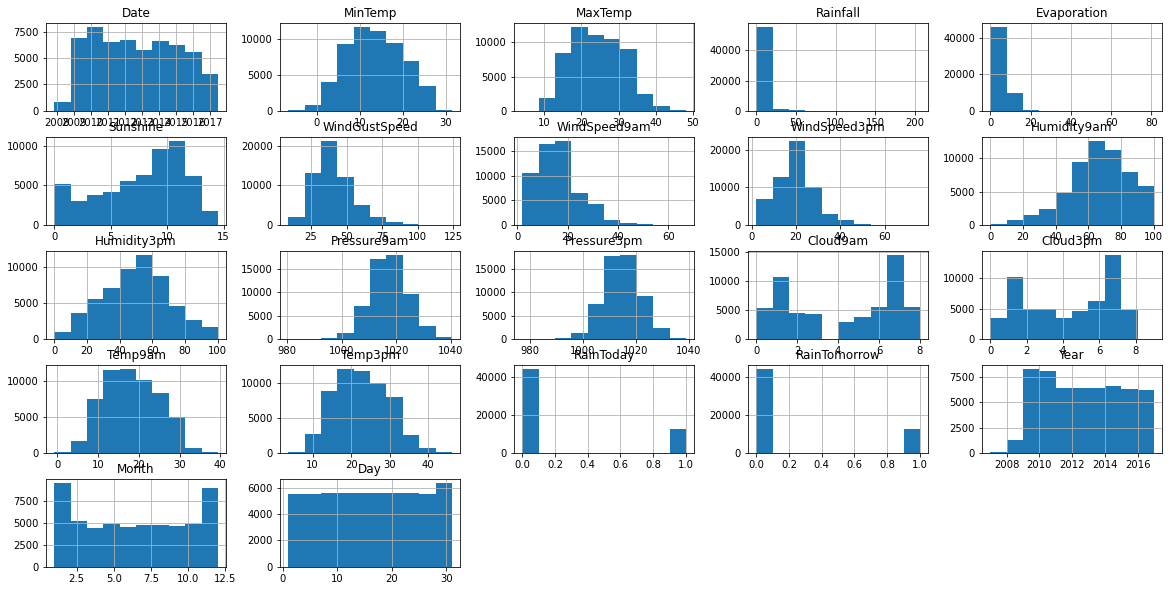

In [92]:
pd.plotting.hist_frame(df, figsize=(20,10));

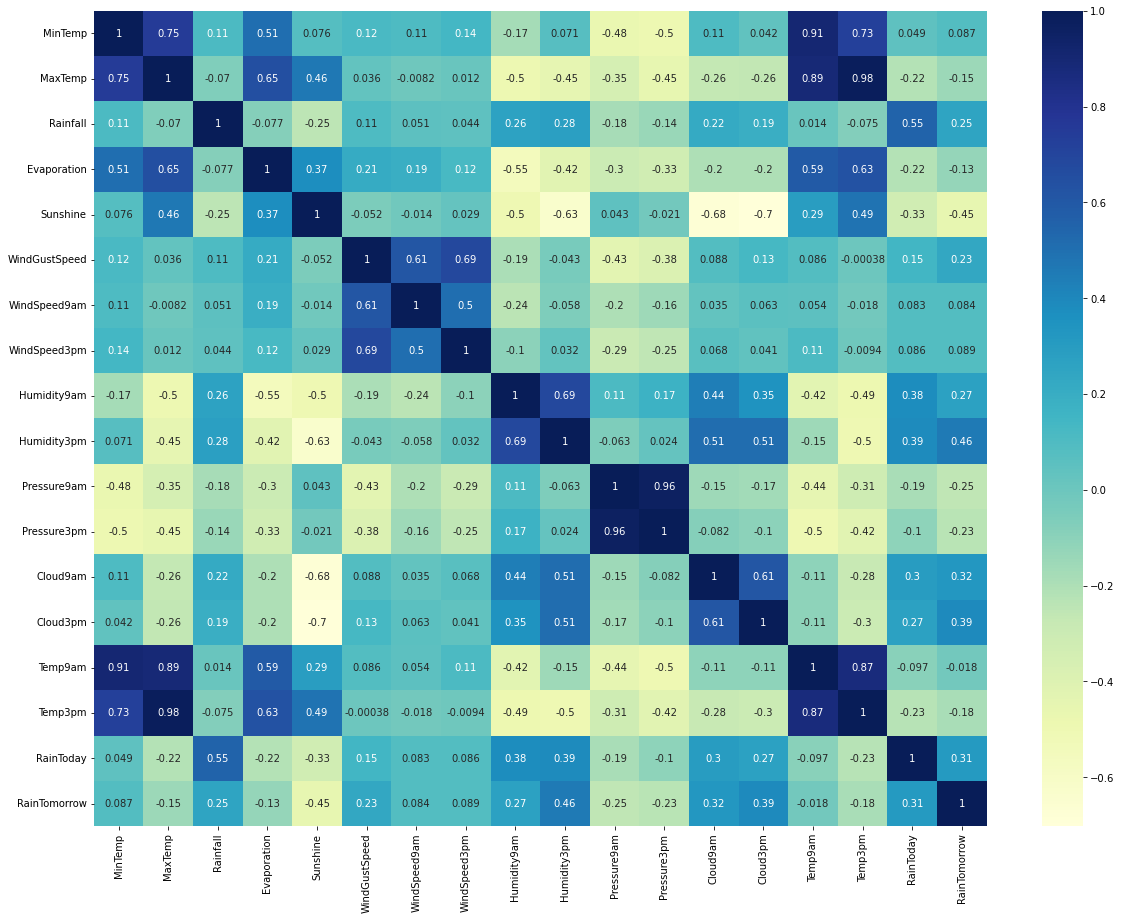

In [93]:
plt.figure(figsize=(20, 15))
p = sns.heatmap(df.iloc[:, 0:23].corr(), annot=True, cmap="YlGnBu")

<AxesSubplot:>

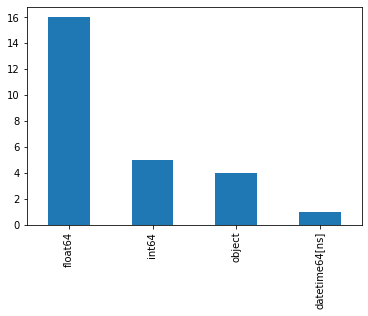

In [94]:
df.dtypes.value_counts().plot(kind='bar')

<AxesSubplot:>

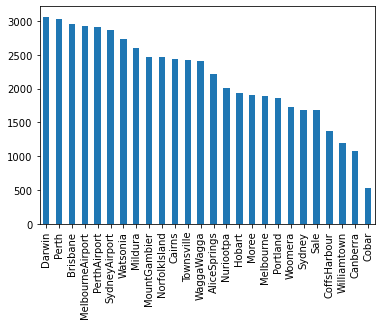

In [95]:
df['Location'].value_counts().plot(kind='bar')

<AxesSubplot:>

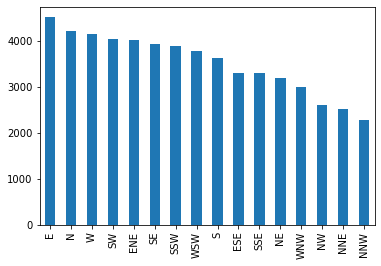

In [96]:
df['WindGustDir'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Sunshine', ylabel='Humidity3pm'>

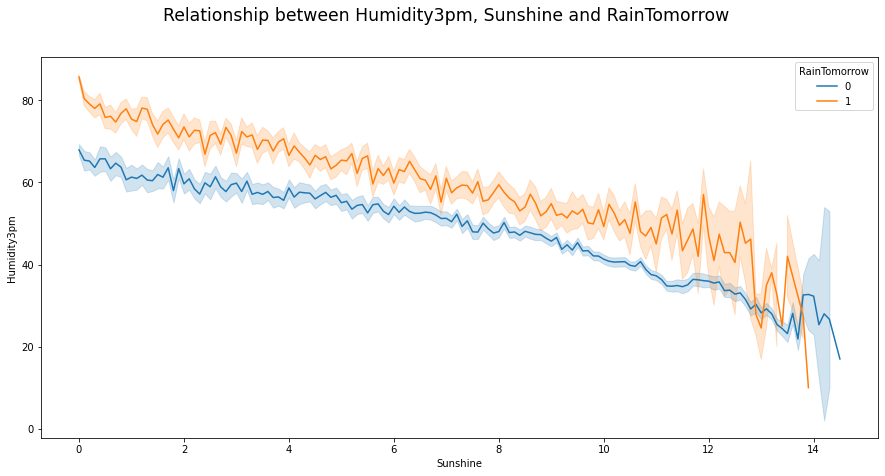

In [97]:
fig=plt.figure(figsize=(15,7))
plt.suptitle('Relationship between Humidity3pm, Sunshine and RainTomorrow',fontsize="xx-large")
sns.lineplot(data=df,x='Sunshine',y='Humidity3pm',hue='RainTomorrow')

<AxesSubplot:xlabel='Pressure9am', ylabel='Pressure3pm'>

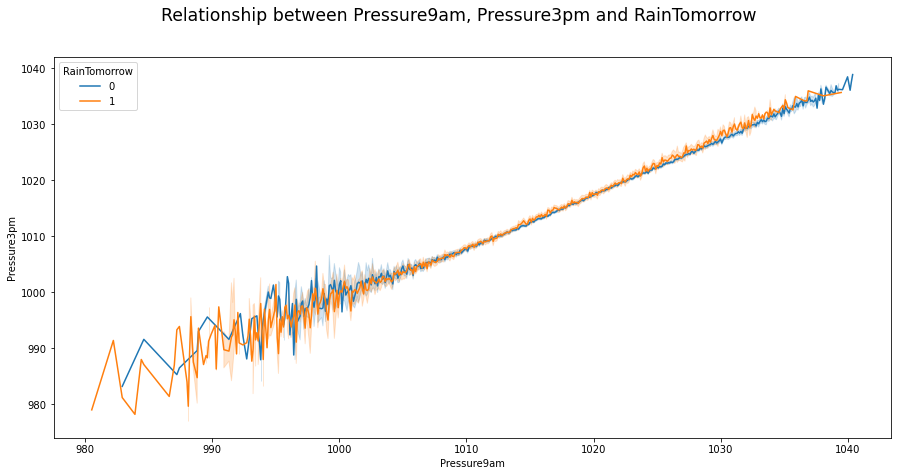

In [98]:
fig=plt.figure(figsize=(15,7))
plt.suptitle('Relationship between Pressure9am, Pressure3pm and RainTomorrow',fontsize="xx-large")
sns.lineplot(data=df,x='Pressure9am',y='Pressure3pm',hue='RainTomorrow')

<AxesSubplot:xlabel='Cloud9am', ylabel='Cloud3pm'>

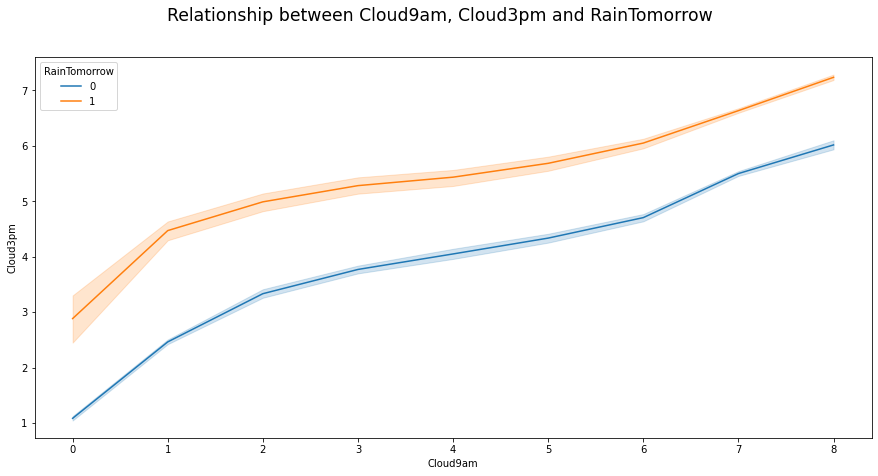

In [99]:
fig=plt.figure(figsize=(15,7))
plt.suptitle('Relationship between Cloud9am, Cloud3pm and RainTomorrow',fontsize="xx-large")
sns.lineplot(data=df,x='Cloud9am',y='Cloud3pm',hue='RainTomorrow')

<AxesSubplot:xlabel='WindSpeed9am', ylabel='WindSpeed3pm'>

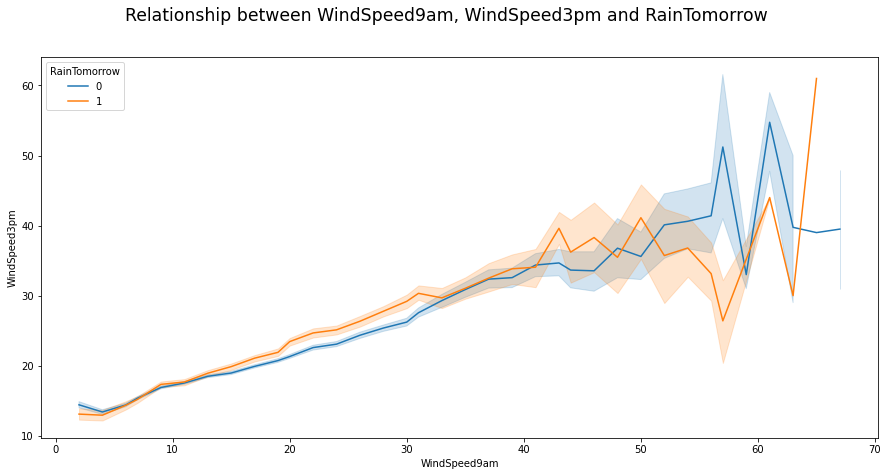

In [101]:
fig=plt.figure(figsize=(15,7))
plt.suptitle('Relationship between WindSpeed9am, WindSpeed3pm and RainTomorrow',fontsize="xx-large")
sns.lineplot(data=df,x='WindSpeed9am',y='WindSpeed3pm',hue='RainTomorrow')